# 📝 Dimensionality Reduction Using PCA: The Eigenfaces Example

## Introduction to Dimensionality Reduction

### Why Reduce Dimensions?
- High-dimensional data is harder to process and visualize.
- Reducing dimensions helps to remove noise and improve model performance.
- Computational efficiency is improved with fewer features.

### What is Principal Component Analysis (PCA)?
- PCA is a linear transformation technique that reduces dimensionality while preserving variance.
- Finds new orthogonal axes (principal components) that maximize variance.
- Used in applications like image compression, feature extraction, and data visualization.

##  Understanding PCA in Simple Terms

### How PCA Works:
1. Standardize the data.
2. Compute the covariance matrix.
3. Compute eigenvalues and eigenvectors of the covariance matrix.
4. Select top eigenvectors (principal components) that explain most variance.
5. Transform original data into the new subspace.

### PCA in Action
- Example: Reducing 1000-dimensional image data to just 50 principal components.
- Maintains structure while discarding less informative features.

![](./assets/figures/pca-explained.png)

##  Eigenfaces – PCA in Face Recognition

### What are Eigenfaces?
- Eigenfaces are a set of eigenvectors computed using PCA on face images.
- Each eigenface represents a principal feature of the face dataset.
- Any face can be approximated as a weighted sum of eigenfaces.

### Why Use Eigenfaces?
- Reduces storage and computational needs for face recognition.
- Captures essential variations in facial structure.
- Helps in efficient classification of faces.

##  Implementing PCA with Eigenfaces in Scikit-learn

In this example, we will apply PCA to a dataset of face images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler

# Load dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data  # Each row is a flattened 64x64 face image

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 100  # Number of principal components to keep
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X_scaled)

##  Displaying Eigenfaces

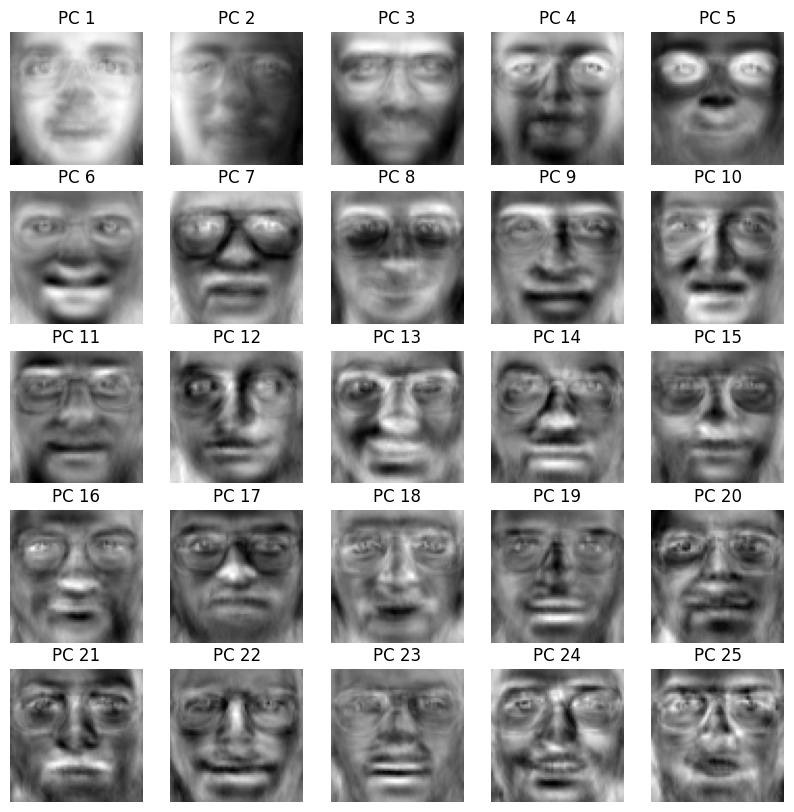

In [2]:
def plot_eigenfaces(pca, h=64, w=64, n_row=5, n_col=5):
    eigenfaces = pca.components_.reshape((n_components, h, w))
    fig, axes = plt.subplots(n_row, n_col, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(eigenfaces[i], cmap="gray")
        ax.set_title(f"PC {i+1}")
        ax.axis("off")
    plt.show()


plot_eigenfaces(pca)

##  Reconstructing Faces Using PCA

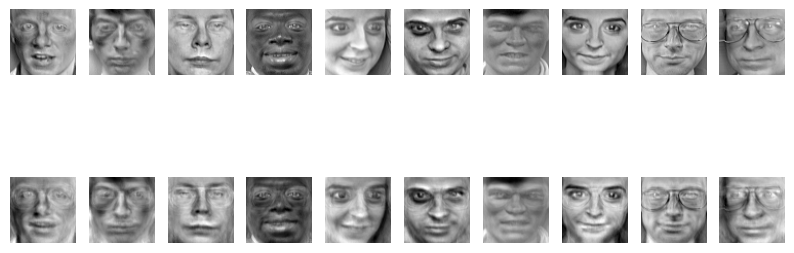

In [3]:
# Reconstruct faces using only the top 100 components
X_reconstructed = pca.inverse_transform(X_pca)

# Plot original vs reconstructed images


def plot_reconstruction(original, reconstructed, n=10, h=64, w=64):
    fig, axes = plt.subplots(2, n, figsize=(10, 4))
    for i in range(n):
        axes[0, i].imshow(original[i].reshape(h, w), cmap="gray")
        axes[0, i].axis("off")
        axes[1, i].imshow(reconstructed[i].reshape(h, w), cmap="gray")
        axes[1, i].axis("off")
    plt.show()


plot_reconstruction(X_scaled, X_reconstructed)

### Variance Explained by PCA

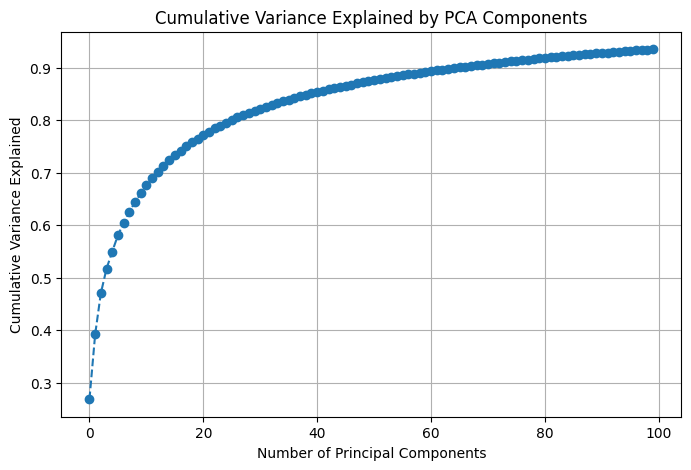

In [4]:
# Show variance explained by PCA
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker="o", linestyle="--")
plt.title("Cumulative Variance Explained by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()

## Evaluating PCA for Face Recognition

### Advantages:
- Reduces storage and computation.
- Removes redundant information.
- Speeds up facial recognition algorithms.

### Limitations:
- Sensitive to lighting and pose variations.
- Eigenfaces may not capture fine details.
- Works best with well-aligned datasets.

## Conclusion
- PCA is a powerful tool for dimensionality reduction.
- Eigenfaces demonstrate PCA’s ability to extract meaningful features from images.
- Face recognition systems use PCA to make processing faster and more efficient.
- Next Steps: Try applying PCA to other datasets like handwritten digits (MNIST) or object detection.